**Импортируем библиотеки**

In [ ]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
import pickle

In [ ]:
#импорт
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score, precision_score
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

**Модели для переменной "Прочность при растяжнии" (pr)**

In [ ]:
dataset_pr = pd.read_excel(r'/content/dataset2.xlsx')
dataset_pr

In [ ]:
dataset_pr.drop(dataset_pr.columns[7], axis = 1, inplace=True)
dataset_pr

In [ ]:
dataset_pr.info()

In [ ]:
#разбиваем на выборки
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(
    dataset_pr.loc[:, dataset_pr.columns != 'Прочность при растяжении, МПа'],
    dataset_pr[['Прочность при растяжении, МПа']],
       test_size = 0.3,
    random_state = 42)

In [ ]:
X_train_pr.shape

In [ ]:
X_test_pr.shape

In [ ]:
y_train_pr.shape

In [ ]:
y_test_pr.shape

**Случайный лес**

In [ ]:
#построение модели и вузуализация метода случайный лес
rfr = RandomForestRegressor(n_estimators=15, max_depth=7, random_state=33)
rfr.fit(X_train_pr, y_train_pr.values)
y_forest = rfr.predict(X_test_pr)

In [ ]:
mean_absolute_forest = mean_absolute_error(y_test_pr, y_forest)*100
mean_squared_forest = mean_squared_error(y_test_pr, y_forest)
r2_score_forest = r2_score(y_test_pr, y_forest)
mean_absolute_percentage_forest = mean_absolute_percentage_error(y_test_pr, y_forest)*100
print('Средняя абсолютная ошибка', mean_absolute_forest)
print('Средняя квадратичная ошибка', mean_squared_forest)
print('Коэффициент детерминации', r2_score_forest)
print('Средняя абсолютная процентная ошибка', mean_absolute_percentage_forest)

In [ ]:
plt.figure(figsize = (10, 7))
plt.title('Тестовые и прогнозные значения Метода случайного леса')
plt.plot(y_forest, label = 'Прогноз', color = 'red')
plt.plot(y_test_pr.values, label = 'Тест', color = 'green')
plt.xlabel('Количество наблюдений')
plt.ylabel('Прочность при растяжении, МПа')
plt.legend()
plt.grid(True)

**К-ближайших соседей**

In [ ]:
#построение модели и вузуализация Метода К ближайших соседей
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_pr, y_train_pr)
y_knn = knn.predict(X_test_pr)

In [ ]:
mean_absolute_knn = mean_absolute_error(y_test_pr, y_knn)*100
mean_squared_knn = mean_squared_error(y_test_pr, y_knn)
r2_score_knn = r2_score(y_test_pr, y_knn)
mean_absolute_percentage_knn = mean_absolute_percentage_error(y_test_pr, y_knn)*100
print('Средняя абсолютная ошибка', mean_absolute_knn)
print('Средняя квадратичная ошибка', mean_squared_knn)
print('Коэффициент детерминации', r2_score_knn)
print('Средняя абсолютная процентная ошибка', mean_absolute_percentage_knn)

In [ ]:
plt.figure(figsize = (10, 7))
plt.title('Тестовые и прогнозные значения Метода К-ближайших соседей')
plt.plot(y_knn, label = 'Прогноз', color = 'red')
plt.plot(y_test_pr.values, label = 'Тест', color = 'green')
plt.xlabel('Количество наблюдений')
plt.ylabel('Прочность при растяжении, МПа')
plt.legend()
plt.grid(True)

**Дерево решений**

In [ ]:
#построение модели и вузуализация Метода дерево решений
dtr = DecisionTreeRegressor()
dtr.fit(X_train_pr, y_train_pr.values)
y_dtr = dtr.predict(X_test_pr)

In [ ]:
mean_absolute_dtr = mean_absolute_error(y_test_pr, y_dtr)*100
mean_squared_dtr = mean_squared_error(y_test_pr, y_dtr)
r2_score_dtr = r2_score(y_test_pr, y_dtr)
mean_absolute_percentage_dtr = mean_absolute_percentage_error(y_test_pr, y_dtr)*100
print('Средняя абсолютная ошибка', mean_absolute_dtr)
print('Средняя квадратичная ошибка', mean_squared_dtr)
print('Коэффициент детерминации', r2_score_dtr)
print('Средняя абсолютная процентная ошибка', mean_absolute_percentage_dtr)

In [ ]:
plt.figure(figsize = (10, 7))
plt.title('Тестовые и прогнозные значения Метода дерева решений')
plt.plot(y_dtr, label = 'Прогноз', color = 'red')
plt.plot(y_test_pr.values, label = 'Тест', color = 'green')
plt.xlabel('Количество наблюдений')
plt.ylabel('Прочность при растяжении, МПа')
plt.legend()
plt.grid(True)

In [ ]:
res = {'Модель':['Случайный лес',
                 'К-ближайших соседей', 'Дерево решений'],
       'Средняя абсолютная ошибка' : [mean_absolute_forest,
                                      mean_absolute_knn, mean_absolute_dtr],
       'Средняя квадратичная ошибка' : [mean_squared_forest,
                                      mean_squared_knn, mean_squared_dtr],
       'Коэффициент детерминации' : [r2_score_forest,
                                      r2_score_knn, r2_score_dtr],
       'Средняя абсолютная процентная ошибка': [mean_absolute_percentage_forest,
                                      mean_absolute_percentage_knn, mean_absolute_percentage_dtr]}

In [ ]:
res = pd.DataFrame(res)
res

**Подбор гиперпараметров**

In [ ]:
#Случайный лес
parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['auto'],
              'criterion': ['mse'] }
grid = GridSearchCV(estimator = rfr, param_grid = parametrs, cv = 10)
grid.fit(X_train_pr, y_train_pr)

In [ ]:
#параметры лучшей модели
grid.best_params_

In [ ]:
#ошибка на лучшей модели
print(grid.best_score_)

In [ ]:
rfr_grid = RandomForestRegressor(n_estimators=300, criterion='mse', max_depth=15, random_state=33)

In [ ]:
rfr_grid.fit(X_train_pr, y_train_pr.values)

In [ ]:
y_forest_grid = rfr_grid.predict(X_test_pr)

In [ ]:
mean_absolute_forest1 = mean_absolute_error(y_test_pr, y_forest_grid)*100
mean_squared_forest1 = mean_squared_error(y_test_pr, y_forest_grid)
r2_score_forest1 = r2_score(y_test_pr, y_forest_grid)
mean_absolute_percentage_forest1 = mean_absolute_percentage_error(y_test_pr, y_forest_grid)*100
print('Средняя абсолютная ошибка', mean_absolute_forest1)
print('Средняя квадратичная ошибка', mean_squared_forest1)
print('Коэффициент детерминации', r2_score_forest1)
print('Средняя абсолютная процентная ошибка', mean_absolute_percentage_forest1)

In [ ]:
plt.figure(figsize = (10, 7))
plt.title('Тестовые и прогнозные значения Метода случайного леса')
plt.plot(y_forest, label = 'Прогноз', color = 'red')
plt.plot(y_test_pr.values, label = 'Тест', color = 'green')
plt.xlabel('Количество наблюдений')
plt.ylabel('Модуль упругости при растяжении, ГПа')
plt.legend()
plt.grid(True)

In [ ]:
#К ближайших соседей
knn = KNeighborsRegressor()
knn_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
gs = GridSearchCV(knn, knn_params, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs.fit(X_train_pr, y_train_pr)

In [ ]:
#параметры лучшей модели
gs.best_params_

In [ ]:
#ошибка на лучшей модели
print(gs.best_score_)

In [ ]:
knn_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 3, weights = 'distance')

In [ ]:
knn_grid.fit(X_train_pr, y_train_pr)

In [ ]:
y_knn_grid = rfr_grid.predict(X_test_pr)

In [ ]:
mean_absolute_knn1 = mean_absolute_error(y_test_pr, y_knn_grid)*100
mean_squared_knn1 = mean_squared_error(y_test_pr, y_knn_grid)
r2_score_knn1 = r2_score(y_test_pr, y_knn_grid)
mean_absolute_percentage_knn1 = mean_absolute_percentage_error(y_test_pr, y_knn_grid)*100
print('Средняя абсолютная ошибка', mean_absolute_knn1)
print('Средняя квадратичная ошибка', mean_squared_knn1)
print('Коэффициент детерминации', r2_score_knn1)
print('Средняя абсолютная процентная ошибка', mean_absolute_percentage_knn1)

In [ ]:
plt.figure(figsize = (10, 7))
plt.title('Тестовые и прогнозные значения Метода случайного леса')
plt.plot(y_knn_grid, label = 'Прогноз', color = 'red')
plt.plot(y_test_pr.values, label = 'Тест', color = 'green')
plt.xlabel('Количество наблюдений')
plt.ylabel('Модуль упругости при растяжении, ГПа')
plt.legend()
plt.grid(True)

In [ ]:
#Дерево решений
param_gr = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'splitter': ['best', 'random'],
               'max_depth': [3,5,7,9,11],
               'min_samples_split': [200,250,300],
               'min_samples_leaf': [100,150,200],
               'max_features': ['auto', 'sqrt', 'log2']}
grids = GridSearchCV(dtr, param_gr, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
grids.fit(X_train_pr, y_train_pr)

In [ ]:
#параметры лучшей модели
grids.best_params_

In [ ]:
#ошибка на лучшей модели
print(grids.best_score_)

In [ ]:
dtr_grid = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_features='auto',
                      min_samples_leaf=100, min_samples_split=200, splitter='best')

In [ ]:
dtr_grid.fit(X_train_pr, y_train_pr)

In [ ]:
y_dtr_grid = rfr_grid.predict(X_test_pr)

In [ ]:
mean_absolute_dtr1 = mean_absolute_error(y_test_pr, y_dtr_grid)*100
mean_squared_dtr1 = mean_squared_error(y_test_pr, y_dtr_grid)
r2_score_dtr1 = r2_score(y_test_pr, y_dtr_grid)
mean_absolute_percentage_dtr1 = mean_absolute_percentage_error(y_test_pr, y_dtr_grid)*100
print('Средняя абсолютная ошибка', mean_absolute_dtr1)
print('Средняя квадратичная ошибка', mean_squared_dtr1)
print('Коэффициент детерминации', r2_score_dtr1)
print('Средняя абсолютная процентная ошибка', mean_absolute_percentage_dtr1)

In [ ]:
plt.figure(figsize = (10, 7))
plt.title('Тестовые и прогнозные значения Метода случайного леса')
plt.plot(y_dtr_grid, label = 'Прогноз', color = 'red')
plt.plot(y_test_pr.values, label = 'Тест', color = 'green')
plt.xlabel('Количество наблюдений')
plt.ylabel('Модуль упругости при растяжении, ГПа')
plt.legend()
plt.grid(True)

In [ ]:
res1 = {'Модель':['Случайный лес',
                 'К-ближайших соседей', 'Дерево решений'],
       'Средняя абсолютная ошибка' : [mean_absolute_forest1,
                                      mean_absolute_knn1, mean_absolute_dtr1],
       'Средняя квадратичная ошибка' : [mean_squared_forest1,
                                      mean_squared_knn1, mean_squared_dtr1],
       'Коэффициент детерминации' : [r2_score_forest1,
                                      r2_score_knn1, r2_score_dtr1],
       'Средняя абсолютная процентная ошибка': [mean_absolute_percentage_forest1,
                                      mean_absolute_percentage_knn1, mean_absolute_percentage_dtr1]}

In [ ]:
res1 = pd.DataFrame(res1)
res1

,Модель,Средняя абсолютная ошибка,Средняя квадратичная ошибка,Коэффициент детерминации,Средняя абсолютная процентная ошибка
0,Случайный лес,0.921542,0.000216,0.962246,1.404376
1,К-ближайших соседей,0.921542,0.000216,0.962246,1.404376
2,Дерево решений,0.921542,0.000216,0.962246,1.404376


**Создание нейронной сети**

In [ ]:
dataset = pd.read_excel(r'/content/dataset2.xlsx')
dataset.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.loc[:, dataset.columns != 'Соотношение матрица-наполнитель'],
    dataset[['Соотношение матрица-наполнитель']], test_size = 0.3, random_state = 14)


In [ ]:
import tensorflow as tf

In [ ]:
def create_model(lyrs=[32], act='relu', opt='SGD', dr=0.1):
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(
        seed
    )
    
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(1, activation='relu'))  # выходной слой
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mae', 'accuracy'])
 
    return model

In [ ]:
model = create_model(lyrs=[128, 64, 16, 3], dr=0.05)

In [ ]:
print(model.summary())

Epoch 1/100
15/15 [==============================] - 2s 23ms/step - loss: 0.0135 - mae: 8.7581e-04 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_mae: 8.7817e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0135 - mae: 8.7581e-04 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_mae: 8.7817e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0135 - mae: 8.7581e-04 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_mae: 8.7817e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0135 - mae: 8.7581e-04 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_mae: 8.7817e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0135 - mae: 8.7581e-04 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_mae: 8.7817e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0

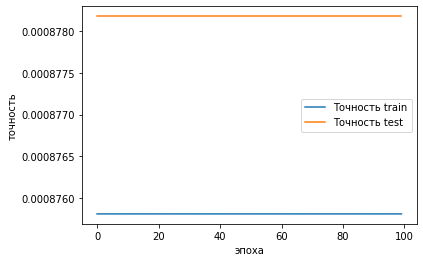

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 100, 
                    verbose = 1, 
                    validation_split = 0.3)
plt.plot(history.history['mae'],
         label = 'Точность train')
plt.plot(history.history['val_mae'],
         label = 'Точность test')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Средняя абсолютная процентная ошибка', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Средняя квадратичная ошибка', mean_squared_error(y_test, y_pred))

Средняя абсолютная ошибка 0.0009096316505425524
Средняя абсолютная процентная ошибка 100.0
Средняя квадратичная ошибка 9.166040570871887e-07


In [ ]:
model1 = Sequential()
#входной полносвязный слой
model1.add(Dense(128, input_dim = 12, activation='relu'))
#этот метод позволет избежать переобучения
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='relu'))
#компилируем модель
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
#Вывод структуры нейронки
print(model1.summary())

In [ ]:
history = model1.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split = 0.3,
                    verbose = 1)
plt.plot(history.history['loss'],
         label = 'Точность train')
plt.plot(history.history['val_loss'],
         label = 'Точность test')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend()
plt.show()

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
#результаты
print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred1))
print('Средняя абсолютная процентная ошибка', mean_absolute_percentage_error(y_test, y_pred1)*100)
print('Средняя квадратичная ошибка', mean_squared_error(y_test, y_pred1))

In [ ]:
with open ('model.pkl', 'wb') as f:
  pickle.dump(model, f)

In [ ]:
with open ('model1.pkl', 'wb') as f:
  pickle.dump(model1, f)